In [1]:
import requests
from bs4 import BeautifulSoup
from urllib.request import urlopen
import pandas as pd
import numpy as np
 
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
sns.set_style("whitegrid")
import altair as alt
alt.renderers.enable("notebook")


C:\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
  stacklevel=1)


RendererRegistry.enable('notebook')

In [2]:
def get_url_text(url):
    contents=[]
    with urlopen(url) as response:
        soup = BeautifulSoup(response, 'html.parser')
        #breadcrum = path.findAll(text=True)
        breadcrum = soup.findAll(text=True)
        for anchor in breadcrum.find_all('p'):
            contents.append(anchor.get_text())
            #breadcrum = [item.strip() for item in breadcrum if str(item)]
    return contents

def get_url_text2(url):
    contents=[]
    final_article=""
    with urlopen(url) as response:
        soup = BeautifulSoup(response, 'html.parser')
        for anchor in soup.find_all('p'):
            contents.append(anchor.get_text())
            final_article = " ".join(contents)
    
    return final_article


def get_url_text1(url):
    # Scraping the first 5 articles
    number_of_articles = 5
    r1 = requests.get(url)
    coverpage = r1.content
    soup1 = BeautifulSoup(coverpage, 'html.parser')
# Empty lists for content, links and titles
    coverpage_news = soup1.find_all('p')
    news_contents = []
    list_links = []
    list_titles = []
    n=0
    link = coverpage_news[n].find('a')['href']
    list_links.append(link)
    article = requests.get(link)
    article_content = article.content
    soup_article = BeautifulSoup(article_content, 'html.parser')
    body = soup_article.find_all('div')
    x = body[0].find_all('p')
    # Unifying the paragraphs
    list_paragraphs = []
    for p in np.arange(0, len(x)):
        paragraph = x[p].get_text()
        list_paragraphs.append(paragraph)
        final_article = " ".join(list_paragraphs)
    return final_article

In [3]:
# Data creation from Scrapping Web page
url_dict={"finance":["https://www.investopedia.com/articles/investing/052014/how-googles-selfdriving-car-will-change-everything.asp"]
          ,"technology":["https://en.wikipedia.org/wiki/Self-driving_car","https://www.nhtsa.gov/technology-innovation/automated-vehicles-safety"],
         "business":["https://www.wired.com/story/gm-driverless-toyota-e-palette-byton-ev"],
         "politics":["https://www.latimes.com/politics/la-na-pol-self-driving-politics-20171121-story.html"] }

car_data={}
content_list=[]
url_list=[]
category_list=[]

for category,url1 in    url_dict.items():
 
    for item in url1:
        data=get_url_text2(item)
        content_list.append(data)
        url_list.append(item)
        category_list.append(category)
 

df= pd.DataFrame({"Url_Name":url_list,"Content":content_list,"Category":category_list})
print(df)
 
# data=get_url_text(url)
# 
# print("---------------------")

                                            Url_Name  \
0  https://www.investopedia.com/articles/investin...   
1     https://en.wikipedia.org/wiki/Self-driving_car   
2  https://www.nhtsa.gov/technology-innovation/au...   
3  https://www.wired.com/story/gm-driverless-toyo...   
4  https://www.latimes.com/politics/la-na-pol-sel...   

                                             Content    Category  
0  \nImagine getting into your car, typing—or, be...     finance  
1  \n A self-driving car, also known as an autono...  technology  
2  The continuing evolution of automotive technol...  technology  
3  To revist this article, visit My Profile, then...    business  
4  In its race to embrace driverless vehicles, Wa...    politics  


In [4]:
from IPython.display import display, HTML

# display(HTML("""
# <style>
# form.vega-bindings {
#   position: absolute;
#   right: 0px;
#   top: 0px;
#    height=300;
#     width=700;
# }
# </style>
# """))

bars = alt.Chart(df).mark_bar(size=150).encode(
    x=alt.X("Category"),
    y=alt.Y("count():Q", axis=alt.Axis(title='Number of articles')),
    tooltip=[alt.Tooltip('count()', title='Number of articles'), 'Category'],
    color='Category'

).interactive()

text = bars.mark_text(
    align='center',
    baseline='bottom',
).encode(
    text='count()'
)

(bars + text).interactive().properties(
    height=300, 
    width=700,
    title = "Number of articles in each category",
)
# alt.renderers.enable('notebook')
alt.renderers.enable('mimetype')

bars.show()
#bars.save('bars.html')



Displaying chart at http://localhost:17352/


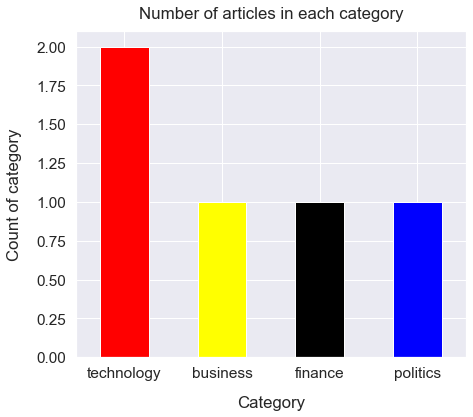

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set(font_scale=1.4)

c = ['red', 'yellow', 'black', 'blue', 'orange']
    
df['Category'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0, color=c)
plt.xlabel("Category",labelpad=14)
plt.ylabel("Count of category", labelpad=14)
plt.title("Number of articles in each category", y=1.02);

plt.show()

 


In [6]:
df['id'] = 1
df2 = pd.DataFrame(df.groupby('Category').count()['id']).reset_index()

bars = alt.Chart(df2).mark_bar(size=50).encode(
    x=alt.X('Category'),
    y=alt.Y('PercentOfTotal:Q', axis=alt.Axis(format='.0%', title='% of Articles')),
    color='Category'
).transform_window(
    TotalArticles='sum(id)',
    frame=[None, None]
).transform_calculate(
    PercentOfTotal="datum.id / datum.TotalArticles"
)

text = bars.mark_text(
    align='center',
    baseline='bottom',
    #dx=5  # Nudges text to right so it doesn't appear on top of the bar
).encode(
    text=alt.Text('PercentOfTotal:Q', format='.1%')
)

(bars + text).interactive().properties(
    height=300, 
    width=700,
    title = "% of articles in each category",
)
bars.show()

Displaying chart at http://localhost:17352/


C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


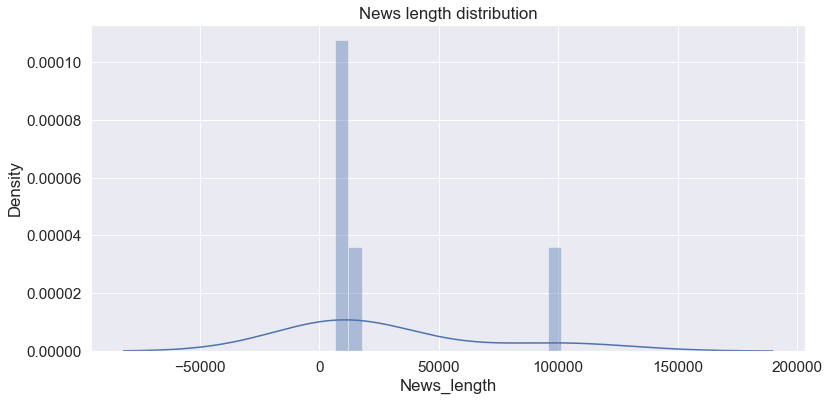

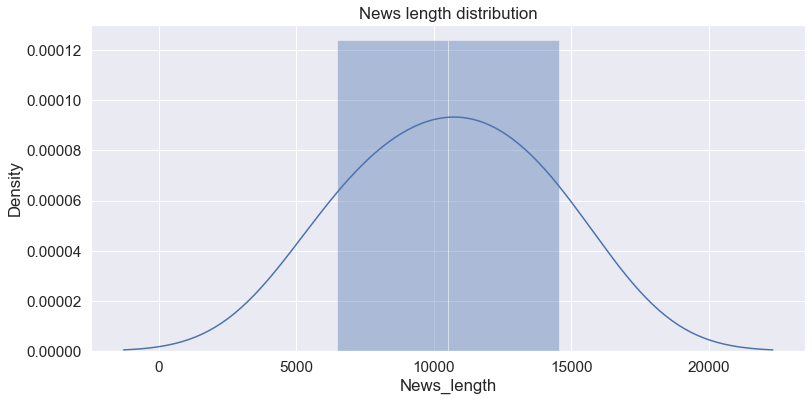

In [7]:
 
df['News_length'] = df['Content'].str.len()
plt.figure(figsize=(12.8,6))
sns.distplot(df['News_length']).set_title('News length distribution');
df['News_length'].describe()

quantile_95 = df['News_length'].quantile(0.95)
df_95 = df[df['News_length'] < quantile_95]
plt.figure(figsize=(12.8,6))
sns.distplot(df_95['News_length']).set_title('News length distribution');

                                            Url_Name  \
0  https://www.investopedia.com/articles/investin...   
1     https://en.wikipedia.org/wiki/Self-driving_car   
2  https://www.nhtsa.gov/technology-innovation/au...   
3  https://www.wired.com/story/gm-driverless-toyo...   
4  https://www.latimes.com/politics/la-na-pol-sel...   

                                             Content    Category  id  \
0  \nImagine getting into your car, typing—or, be...     finance   1   
1  \n A self-driving car, also known as an autono...  technology   1   
2  The continuing evolution of automotive technol...  technology   1   
3  To revist this article, visit My Profile, then...    business   1   
4  In its race to embrace driverless vehicles, Wa...    politics   1   

   News_length  
0        14562  
1       101373  
2        11718  
3         6489  
4         9518  


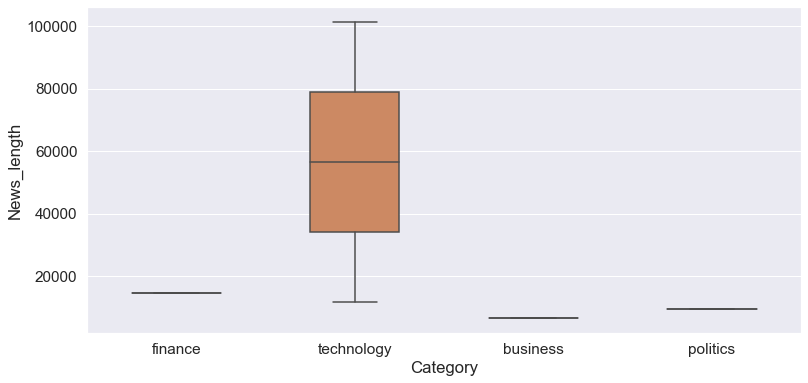

In [8]:
print(df)
plt.figure(figsize=(12.8,6))
sns.boxplot(data=df, x='Category', y='News_length', width=.5);



In [9]:
with open('car_dataset.pickle', 'wb') as output:
    pickle.dump(df, output)